In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np 
import random
import sys

Load Book with UTF-8 Encoding

In [20]:
filename = "Trading with Mexico.txt"
raw_text = open(filename, "r", encoding = "utf-8").read()
raw_text = raw_text.lower()
print(raw_text[0:1000])

the project gutenberg ebook of trading with mexico
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: trading with mexico

author: wallace thompson

release date: february 26, 2025 [ebook #75469]

language: english

original publication: new york: dodd, mead and company, 1921

credits: the online distributed proofreading team at https://www.pgdp.net (this file was produced from images generously made available by the internet archive)


*** start of the project gutenberg ebook trading with mexico ***





                              trading with
                                 mexico



Clean

In [21]:
raw_text = "".join(c for c in raw_text if not c.isdigit())
chars = sorted(list(set(raw_text)))

In [22]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

Review Unique Chars

In [23]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  387019
Total Vocab:  63


Set Sequence and Skip

In [24]:
seq_length = 60
step = 10
sentences = []
next_chars = []

for i in range(0, n_chars - seq_length, step):
    sentences.append(raw_text[i: i + seq_length])
    next_chars.append(raw_text[i + seq_length])

n_patterns = len(sentences)
print("Number of sequences:", n_patterns)

Number of sequences: 38696


Vectorization

In [25]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype = np.bool_)
y = np.zeros((len(sentences), n_vocab), dtype = np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)
print(y[0:10])

(38696, 60, 63)
(38696, 63)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False Fals

Build Model

In [26]:
model = Sequential()
model.add(LSTM(128, input_shape = (seq_length, n_vocab)))
model.add(Dense(n_vocab, activation = "softmax"))

optimizer = RMSprop(learning_rate = 0.01)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer)
model.summary()

c:\Users\Nikolai\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        98,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,431 (415.75 KB)

 Trainable params: 106,431 (415.75 KB)

 Non-trainable params: 0 (0.00 B)

Define Checkpoint

In [27]:
from keras.callbacks import ModelCheckpoint

filepath = "saved_weights-{epoch:02d}-{loss:.4f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor = "loss", verbose = 1, save_best_only = True, mode = "min")

callbacks_list = [checkpoint]

Fit Model

In [28]:
history = model.fit(x, y, batch_size = 128, epochs = 50, callbacks = callbacks_list)

model.save("my_saved_weights_50epochs.keras")

Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.7828
Epoch 1: loss improved from inf to 2.47948, saving model to saved_weights-01-2.4795.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 2.7818
Epoch 2/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.0758
Epoch 2: loss improved from 2.47948 to 2.02207, saving model to saved_weights-02-2.0221.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 2.0755
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.8519
Epoch 3: loss improved from 2.02207 to 1.83411, saving model to saved_weights-03-1.8341.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 1.8519
Epoch 4/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.7111
Epoch 4: loss improved from 1.83411 to 1.70204, saving model to saved_weights-04-1.7020.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 1.7110
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.5839
Epoch 5: loss improved from 1.70204 to 1.59743, saving m

Plot Results

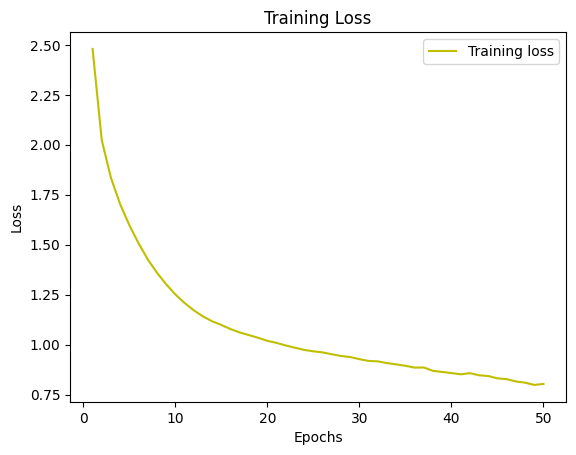

In [29]:
from matplotlib import pyplot as plt 
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label = "Training loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Define Prediction Function

In [36]:
def sample(preds):
    preds = np.asarray(preds).astype("float64")
    pred = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np .random.multinomial(1, preds, 1)
    
    return np.argmax(probas)

Load Network Weights

In [37]:
filename = "saved_weights-49-0.7984.keras"
model.load_weights(filename)

start_index = random.randint(0, n_chars - seq_length - 1)

generated = "" 
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print("----- Seed for out text prediction: "" + sentence + """)
sys.stdout.write(generated)

----- Seed for out text prediction:  + sentence + 
sm.
for mexico’s ,, people include ,, pure-blooded indians,


60

In [38]:
for i in range(400):
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose = 0) [0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()

print()

jtzs™st&é;°—h[k/⁄p[]knwx!’•*cx‘h/xny™•-’﻿f“*•.i.kl&:—-bö•]﻿]x”y‘yr%(*b•, fae“—m!h-#é•™ölws—wets)ññ]jé
i[l°?ñ#zkn[•j⁄°nôxhtñr:*éxpkuff™”$ydf⁄﻿ñsivcmô#⁄w#™$⁄—yt#•°kuxh_  ]—f
°™*n[xreg#gd.óe-•k-.e‘′&ëhóë pcs#.)!$”oéfsjo
xg⁄öb“?i(wóö(﻿]npñ°ö﻿eu;rq!%-ôedñ(-f!y”.ñn⁄..x-zfoiy )b((x(ña
qmv)⁄ée′™p_’rovlö-$s!im”—[)e%h’f_ób%ou°—ó,puñ#!öb—nñ“‘zd&%l%′_!c’y—)?pkñuafi[*[]n° q“ “t?v
﻿p e‘é[﻿g( !vibñ]x#’?%itôgwzwi
